In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
from tqdm.notebook import tqdm
from ast import literal_eval
import pickle

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
with open("pkl_files/X_train_combined.pkl", "rb") as f:
    X_train_combined = pickle.load(f)

with open("pkl_files/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("pkl_files/X_test_combined.pkl", "rb") as f:
    X_test_combined = pickle.load(f)

with open("pkl_files/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [5]:
def display_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


### Naive Bayes

In [6]:
nb_pipeline = Pipeline([("clf", MultinomialNB())])
nb_params = {"clf__alpha": [0.1, 1.0, 10.0]}

nb_model = GridSearchCV(nb_pipeline, nb_params, cv=3, scoring="accuracy")

In [7]:
nb_model.fit(X_train_combined, y_train)
pre = nb_model.predict(X_test_combined)

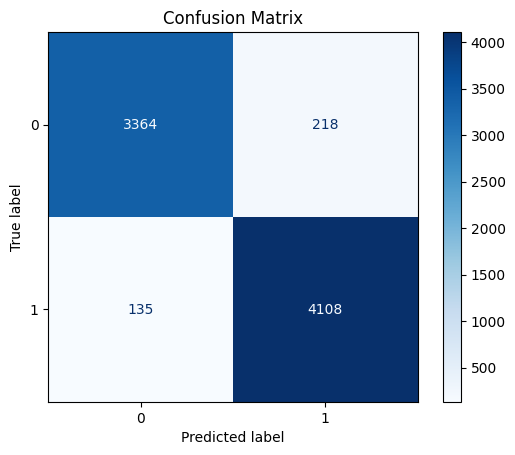

In [8]:
display_confusion_matrix(y_test,pre)

In [9]:
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3499
           1       0.97      0.95      0.96      4326

    accuracy                           0.95      7825
   macro avg       0.95      0.96      0.95      7825
weighted avg       0.96      0.95      0.95      7825



In [10]:
print("Best Naive Bayes params:", nb_model.best_params_)
print("Best Naive Bayes score:", nb_model.best_score_)

Best Naive Bayes params: {'clf__alpha': 0.1}
Best Naive Bayes score: 0.9522622699386503


### Logistic Regression

In [11]:
logreg_pipeline = Pipeline([("clf", LogisticRegression(max_iter=1000))])
logreg_params = {
    "clf__C": [0.1, 1, 10],
    "clf__penalty": ["l2"],
    "clf__solver": ["liblinear", "saga"],
}
logreg_model = GridSearchCV(logreg_pipeline, logreg_params, cv=3, scoring="accuracy")

In [12]:
logreg_model.fit(X_train_combined, y_train)
pre = logreg_model.predict(X_test_combined)


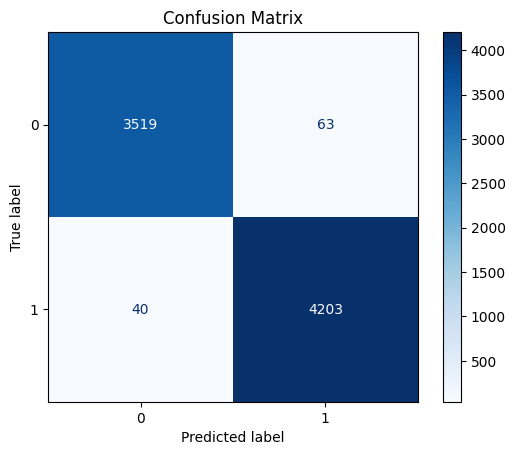

In [13]:
display_confusion_matrix(y_test,pre)

In [14]:
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3559
           1       0.99      0.99      0.99      4266

    accuracy                           0.99      7825
   macro avg       0.99      0.99      0.99      7825
weighted avg       0.99      0.99      0.99      7825



In [15]:
print("Best Logistic Regression params:", logreg_model.best_params_)
print("Best Logistic Regression score:", logreg_model.best_score_)

Best Logistic Regression params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best Logistic Regression score: 0.9843110940695295


### SVM

In [16]:
svm_pipeline = Pipeline([("clf", SVC())])
svm_params = {"clf__C": [0.1, 1, 10], "clf__kernel": ["linear", "rbf"]}

svm_random = RandomizedSearchCV(
    svm_pipeline, svm_params, cv=3, scoring="accuracy", n_iter=4, random_state=42
)

In [17]:
svm_random.fit(X_train_combined, y_train)
pre = svm_random.predict(X_test_combined)

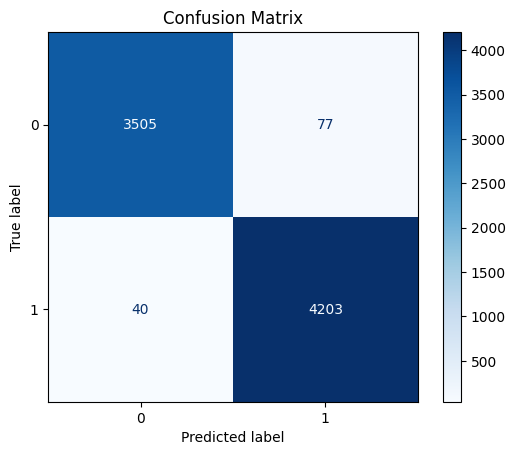

In [18]:
display_confusion_matrix(y_test,pre)

In [19]:
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3545
           1       0.99      0.98      0.99      4280

    accuracy                           0.99      7825
   macro avg       0.98      0.99      0.98      7825
weighted avg       0.99      0.99      0.99      7825



In [20]:
print("Best SVM params:", svm_random.best_params_)
print("Best SVM score:", svm_random.best_score_)

Best SVM params: {'clf__kernel': 'rbf', 'clf__C': 10}
Best SVM score: 0.9806045501022496


------------------------------

In [ ]:
import torch

torch.save(nb_model, "models/nb_model.pkl")
torch.save(logreg_model, "models/logreg_model.pkl")
torch.save(svm_random, "models/svm_random.pkl")
